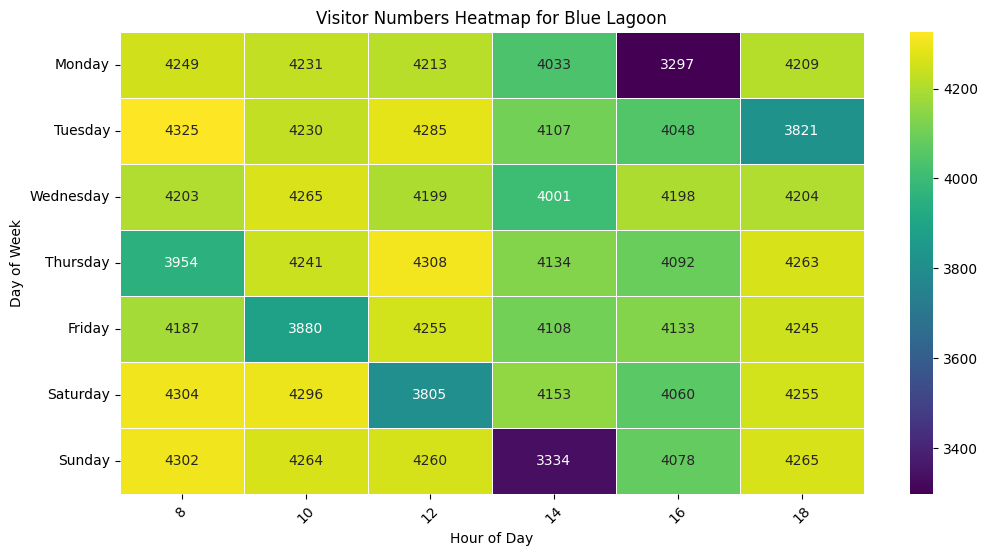

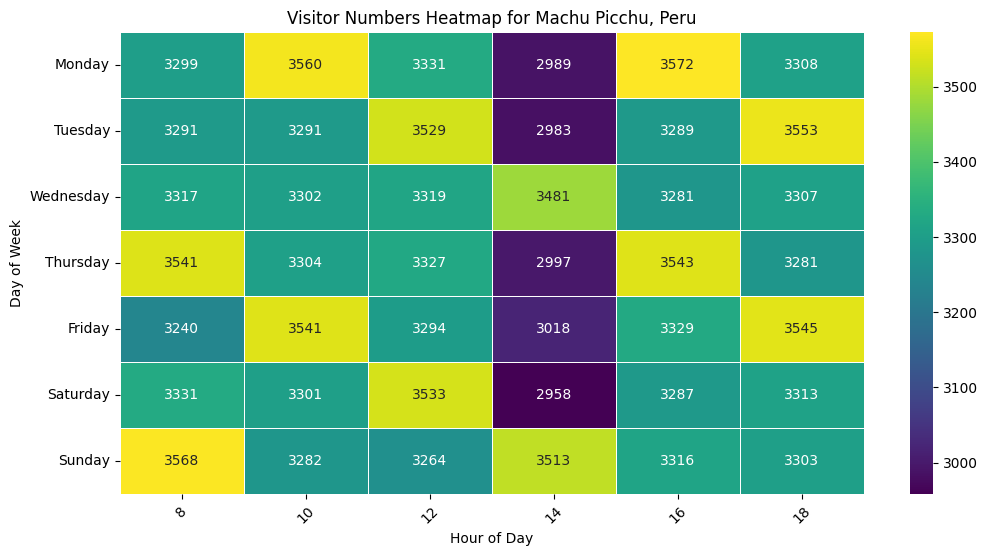

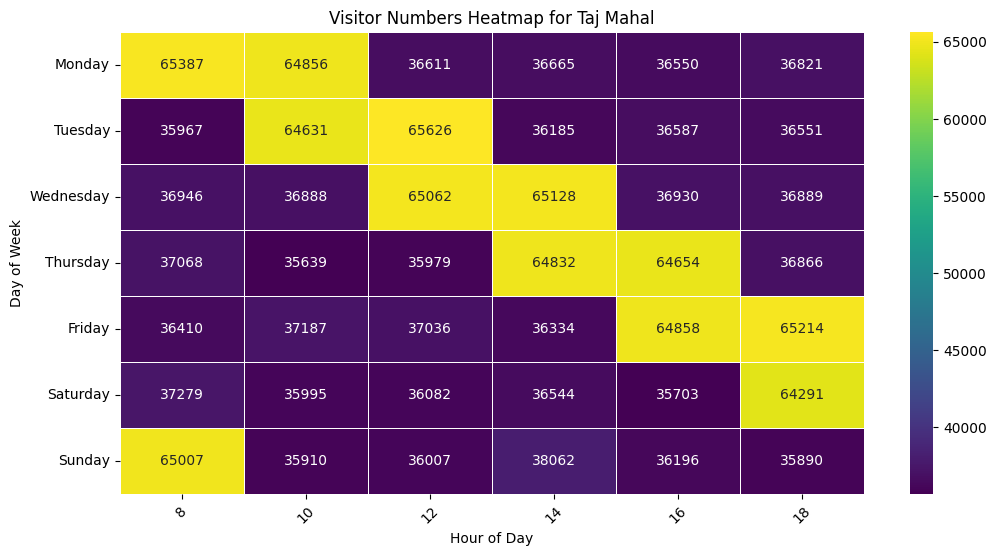

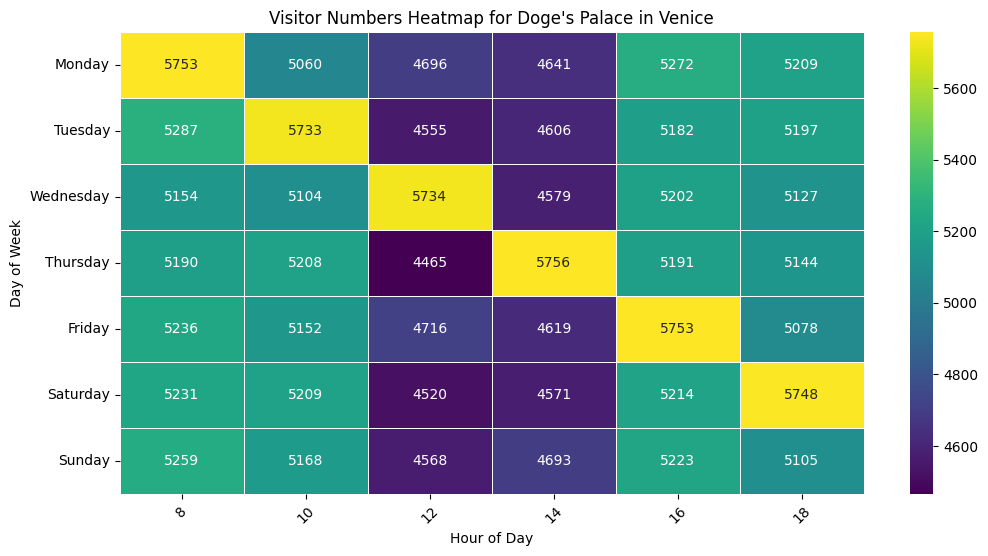

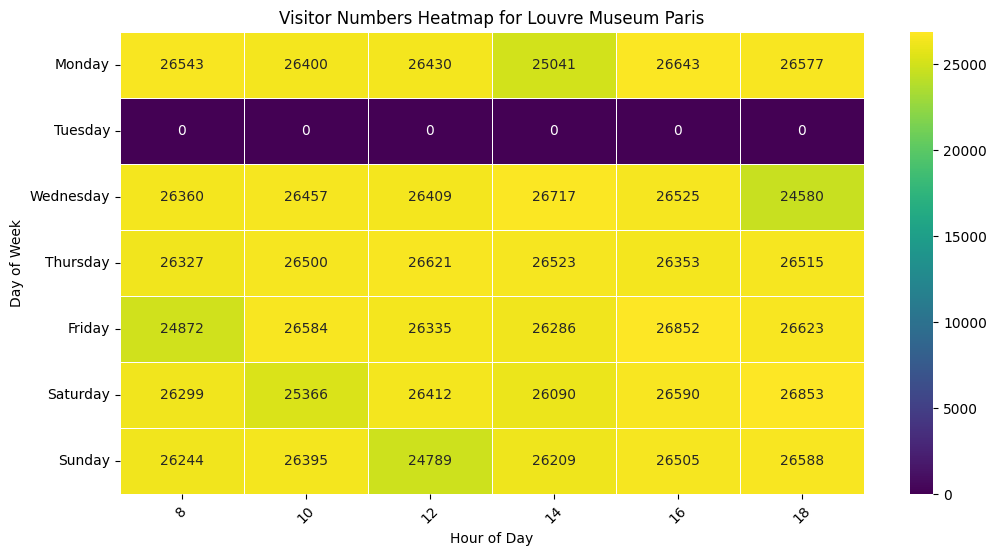

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = '/content/drive/MyDrive/Team7/ForwardKeys_data.csv'
df = pd.read_csv(data_path)

# combining date and time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

# corrected location name
corrected_locations = {
    'Visitors in Blue Lagoon': 'Blue Lagoon',
    'Visitors in Machu Picchu': 'Machu Picchu, Peru',
    'Visitors in Taj Mahal': 'Taj Mahal',
    "Visitors in Doge's Palace": "Doge's Palace in Venice",
    'Visitors in Louvre Museum': 'Louvre Museum Paris'
}

for location_column, location_name in corrected_locations.items():
    # pivot tanle
    pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values=location_column, aggfunc=np.mean)

    # Ordering days
    order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    pivot_table = pivot_table.reindex(order)

    # viz
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_table, cmap='viridis', linewidths=.5, annot=True, fmt=".0f")
    plt.title(f'Visitor Numbers Heatmap for {location_name}')
    plt.ylabel('Day of Week')
    plt.xlabel('Hour of Day')
    plt.xticks(rotation=45)
    plt.show()



In [13]:
print(df.columns)

Index(['Date', 'Time', 'Visitors in Blue Lagoon', 'Visitors in Machu Picchu',
       'Visitors in Taj Mahal', 'Visitors in Doge's Palace',
       'Visitors in Louvre Museum', 'Average Age - Blue Lagoon',
       'Average Age - Machu Picchu', 'Average Age - Taj Mahal',
       'Average Age - Doge's Palace', 'Average Age - Louvre Museum',
       'DateTime', 'Hour', 'Average Age'],
      dtype='object')


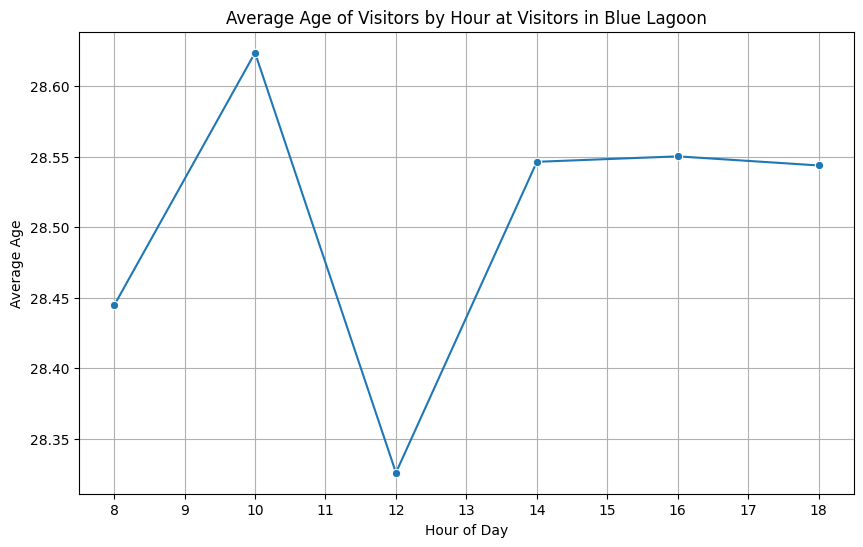

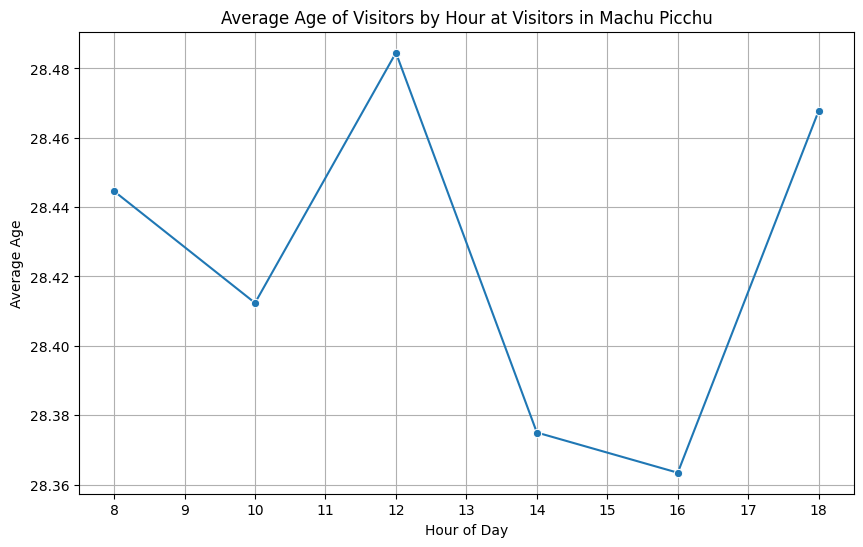

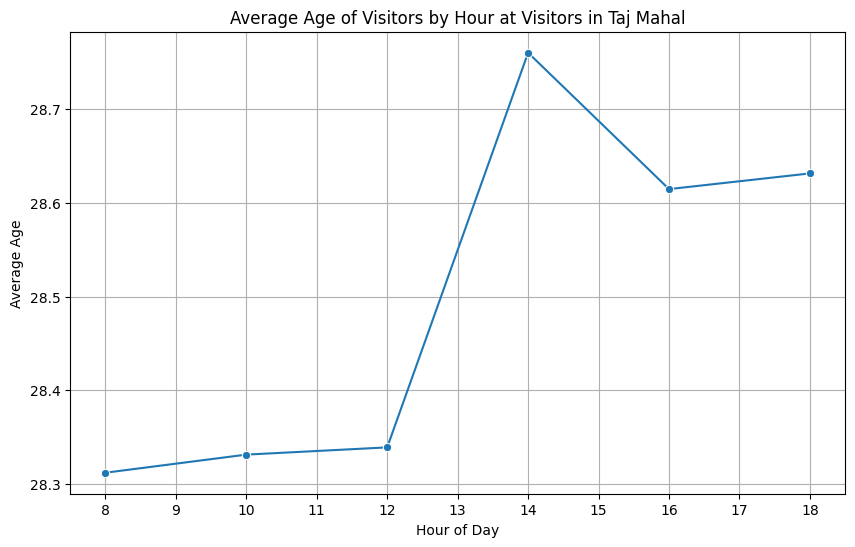

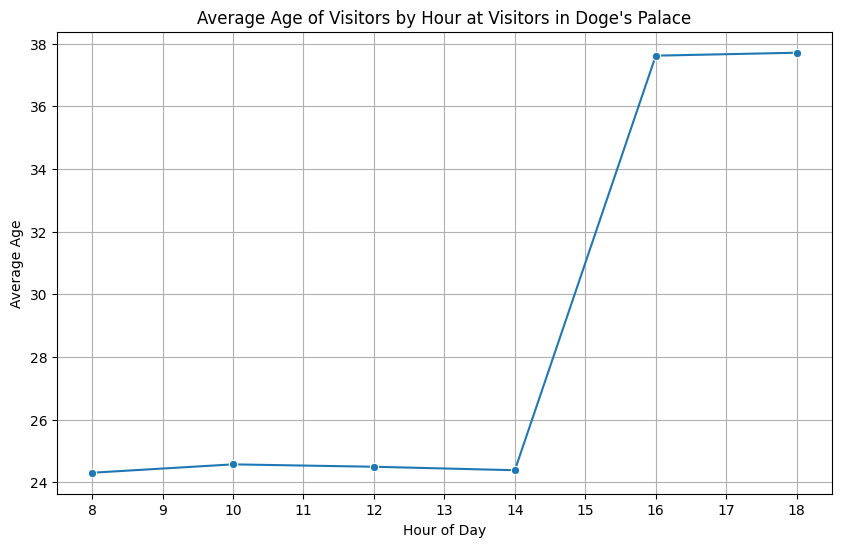

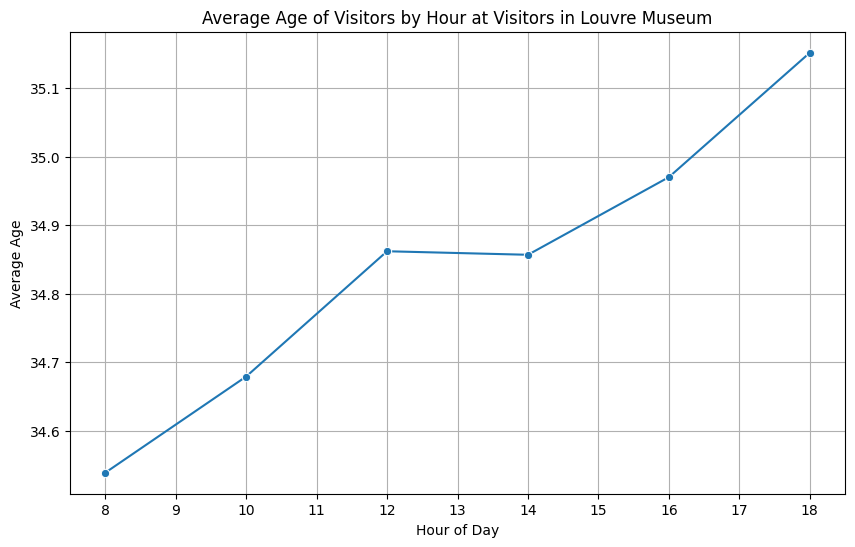

In [24]:
# joim date and time
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Hour'] = df['DateTime'].dt.hour

# define the locationwise average age columns
locations = {
    'Visitors in Blue Lagoon': 'Average Age - Blue Lagoon',
    'Visitors in Machu Picchu': 'Average Age - Machu Picchu',
    'Visitors in Taj Mahal': 'Average Age - Taj Mahal',
    "Visitors in Doge's Palace": 'Average Age - Doge\'s Palace',
    'Visitors in Louvre Museum': 'Average Age - Louvre Museum'
}

for location, age_column in locations.items():

    # Filter data: 8AM - 6 PM
    filtered_data = df[(df['Hour'] >= 8) & (df['Hour'] <= 18)]

    # group by hour
    average_age_by_hour = filtered_data.groupby('Hour')[age_column].mean().reset_index()

    # viz
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Hour', y=age_column, data=average_age_by_hour, marker='o')
    plt.title(f'Average Age of Visitors by Hour at {location}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Age')
    plt.grid(True)
    plt.xticks(range(8, 19))  
    plt.show()